<a href="https://colab.research.google.com/github/utkarsh-k-exp/Forecasting--Principles-and-Practice/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Question: 1 

**For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance.****

1. usnetelec
2. usgdp
3. mcopper
4. enplanements

In [3]:
# box cox transoformation function

def box_cox_transformation(ts, lambd):
  """
  Function will generate a box cox tranformation for the original time series to make variance constant across the data

  Arguments:
  ts -- a pandas series, an original time series
  lambd -- a scalar value, hyperparameter for power tranformation

  Returns:
  ts_transformed -- a pandas series, a time series with box cox tranformation applied
  """

  if lambd == 0:
    return np.log(ts)
  else:
    return (ts**lambd - 1)/lambd

In [85]:
def reverse_box_cox_tranformation(ts_transformed, lambd):
  """
  Function to reverse the box cox tranformation

  Arguments:
  ts_transformed -- a pandas series, time series on transformed scale
  lambd -- a scalar value, hyperparameter of box cox tranformation

  Returns:
  ts -- a pandas time series or dataframe, time series on original scale
  """
  if lambd == 0:
    return np.exp(ts_transformed)
  else:
    return (ts_transformed*lambd + 1)**(1/lambd)

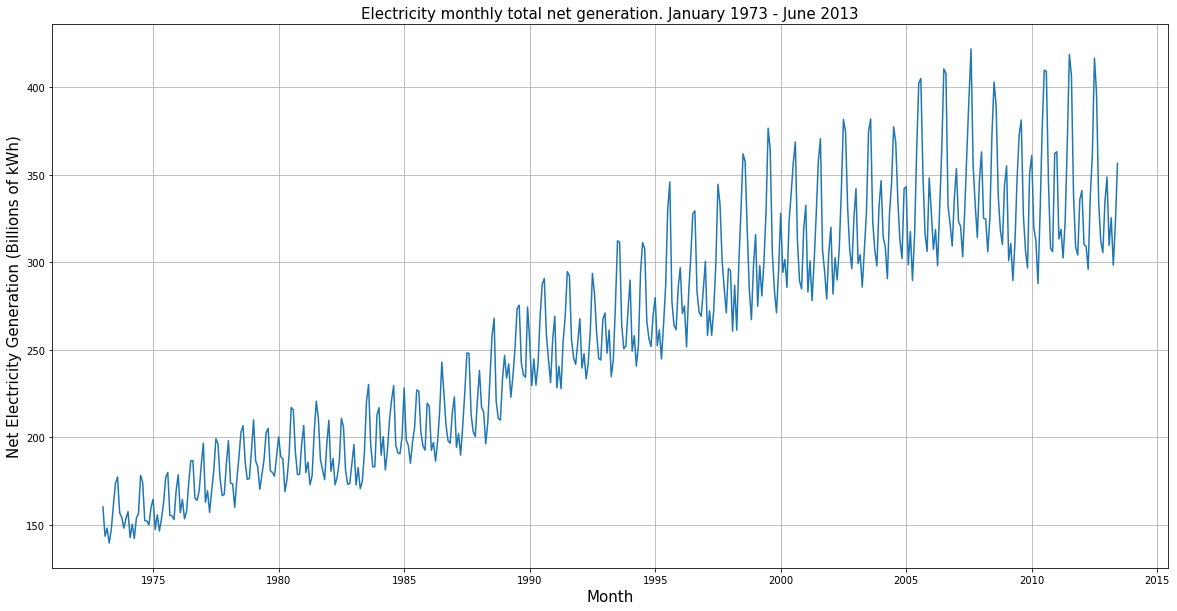

In [17]:
ts_usmelec = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usmelec.csv", index_col='time')  # making the time as index column
ts_usmelec.drop("Unnamed: 0", axis = 1, inplace = True)  # dropping the added index column

# plotting the time series
plt.figure(figsize = (20, 10))
plt.plot(ts_usmelec)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Net Electricity Generation (Billions of kWh)", fontsize = 15)
plt.title("Electricity monthly total net generation. January 1973 - June 2013", fontsize = 15)
plt.grid()
plt.show()

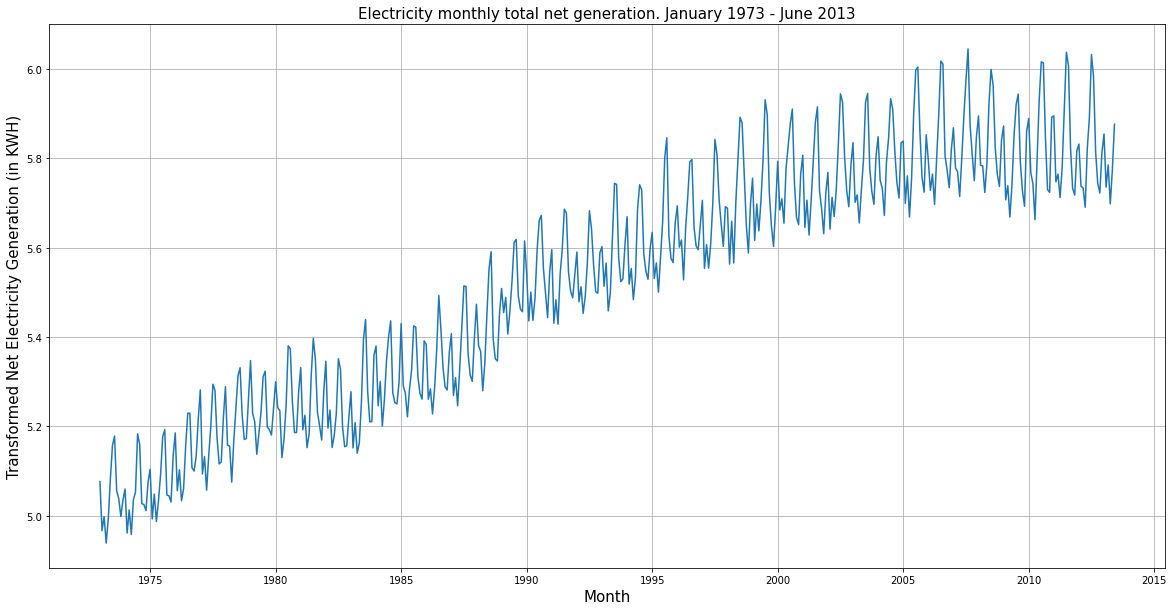

In [28]:
# applying the box cox tranformation on the usmelec time series
lamdb = 0.4  # setting the hyper parameter for box cox tranformation
ts_usmelec_transformed = box_cox_transformation(ts_usmelec, 0)
plt.figure(figsize = (20, 10))
plt.plot(ts_usmelec_transformed)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Transformed Net Electricity Generation (in KWH)", fontsize = 15)
plt.title("Electricity monthly total net generation. January 1973 - June 2013", fontsize = 15)
plt.grid()
plt.show()

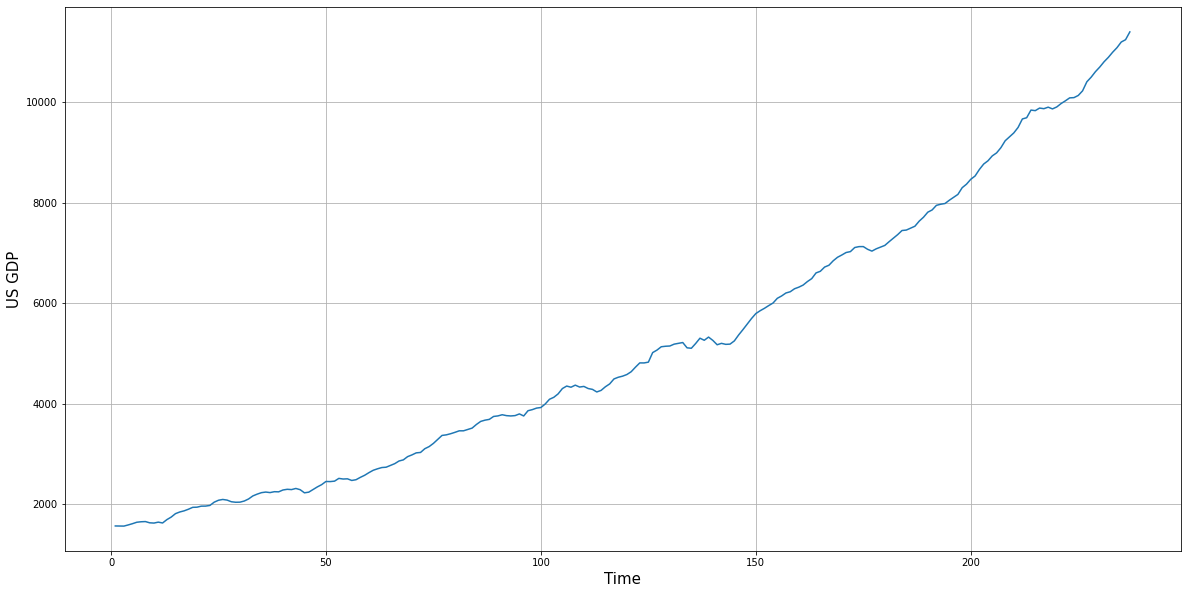

In [31]:
# tranformation of usgdp data

ts_usgdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usgdp.csv", index_col = "Unnamed: 0")
plt.figure(figsize = (20, 10))
plt.plot(ts_usgdp)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("US GDP", fontsize = 15)
plt.grid()
plt.show()

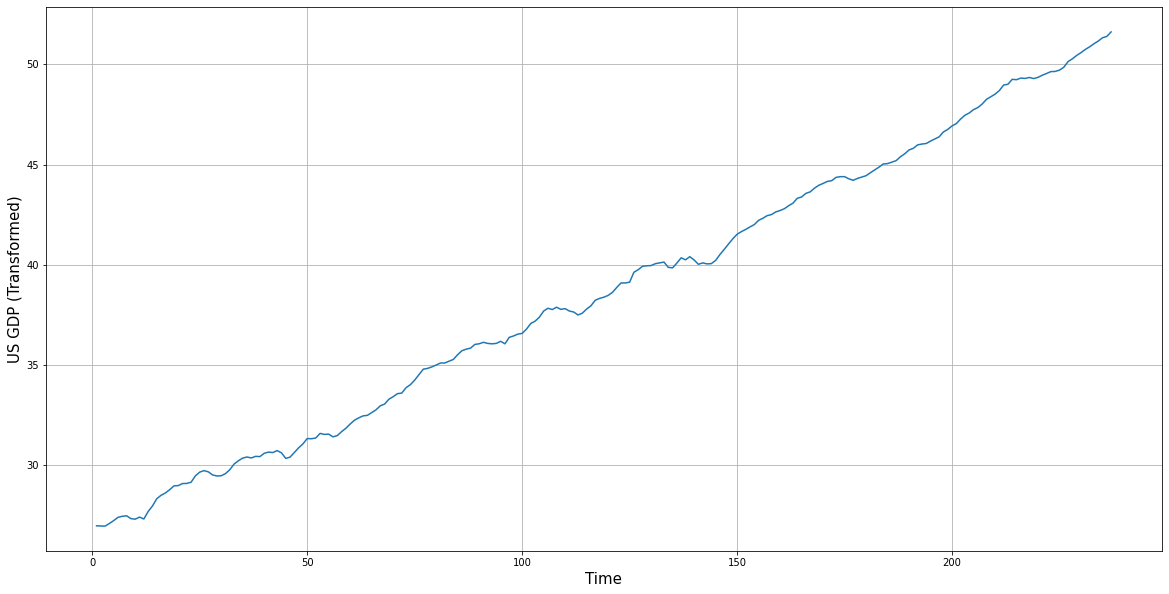

In [37]:
lambd = 0.3
ts_usgdp_transformed = box_cox_transformation(ts_usgdp, lambd)
plt.figure(figsize = (20, 10))
plt.plot(ts_usgdp_transformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("US GDP (Transformed)", fontsize = 15)
plt.grid()
plt.show()

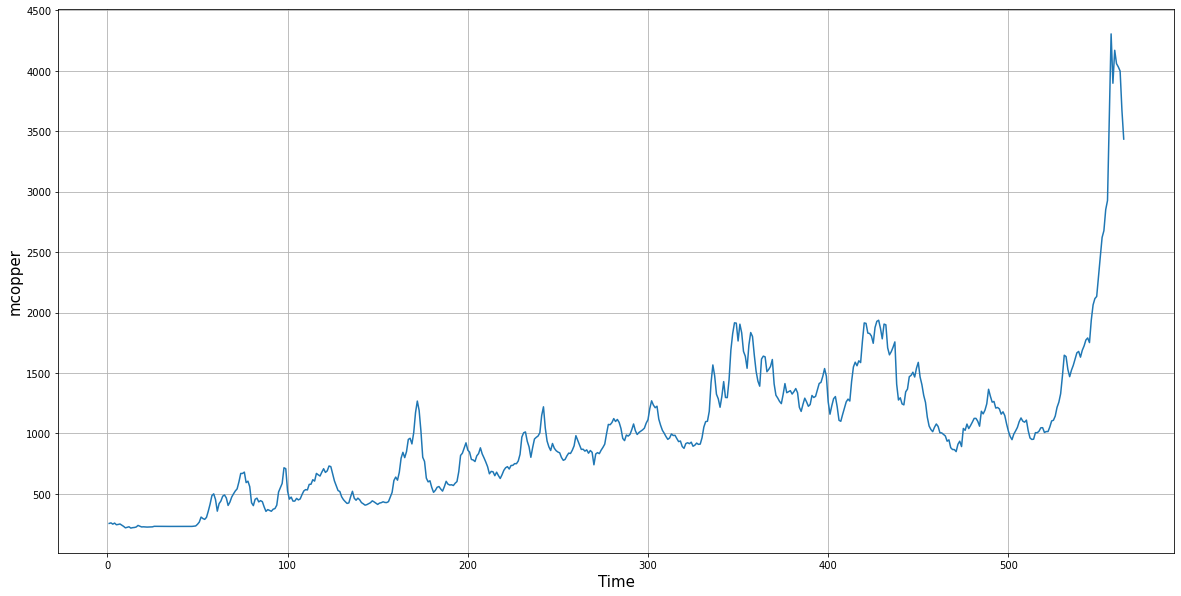

In [41]:
# tranformation of mcopper data

ts_mcopper = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/mcopper.csv", index_col = "Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_mcopper)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("mcopper", fontsize = 15)
plt.grid()
plt.show()

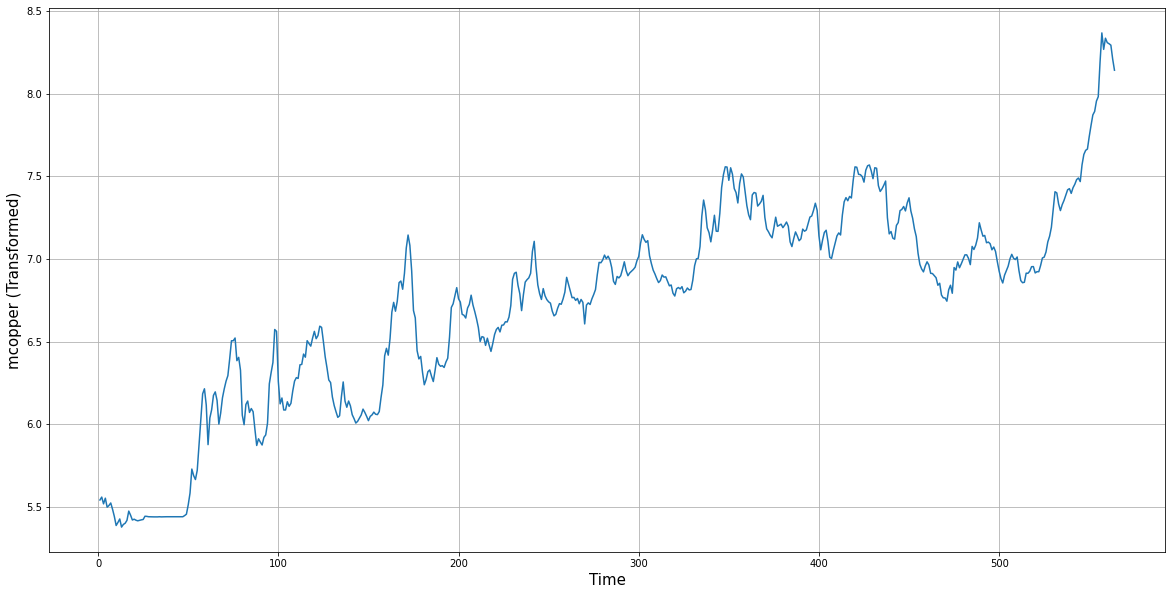

In [45]:
lambd = 0
ts_mcopper_transformed = box_cox_transformation(ts_mcopper, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_mcopper_transformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("mcopper (Transformed)", fontsize = 15)
plt.grid()
plt.show()

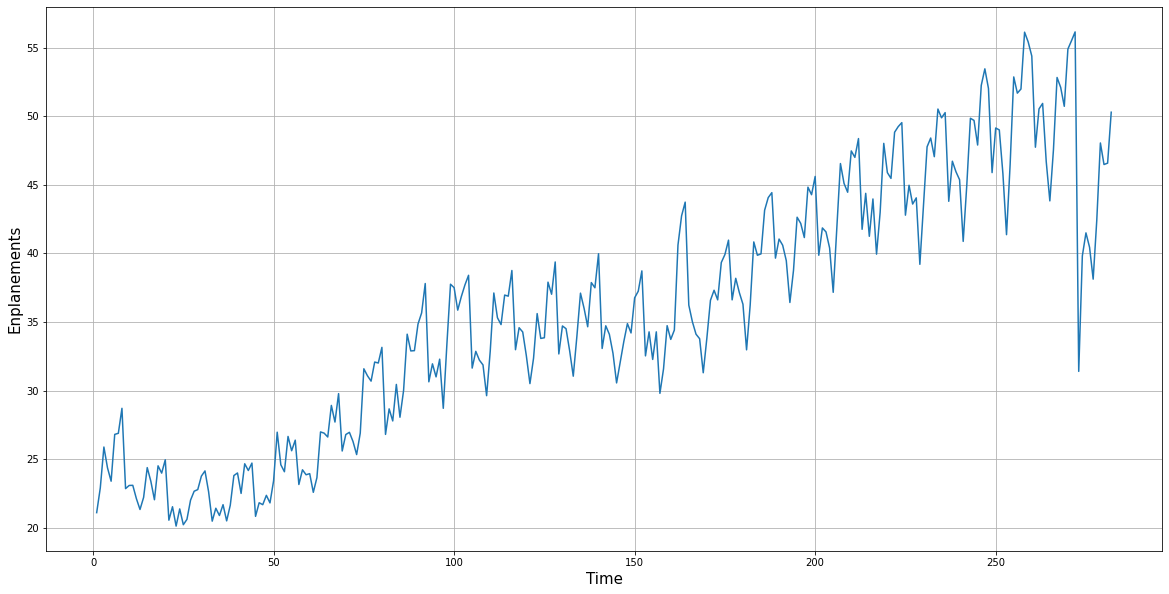

In [47]:
# tranformation of enplanements data

ts_enplanements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/enplanements.csv", index_col = "Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_enplanements)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Enplanements", fontsize = 15)
plt.grid()
plt.show()

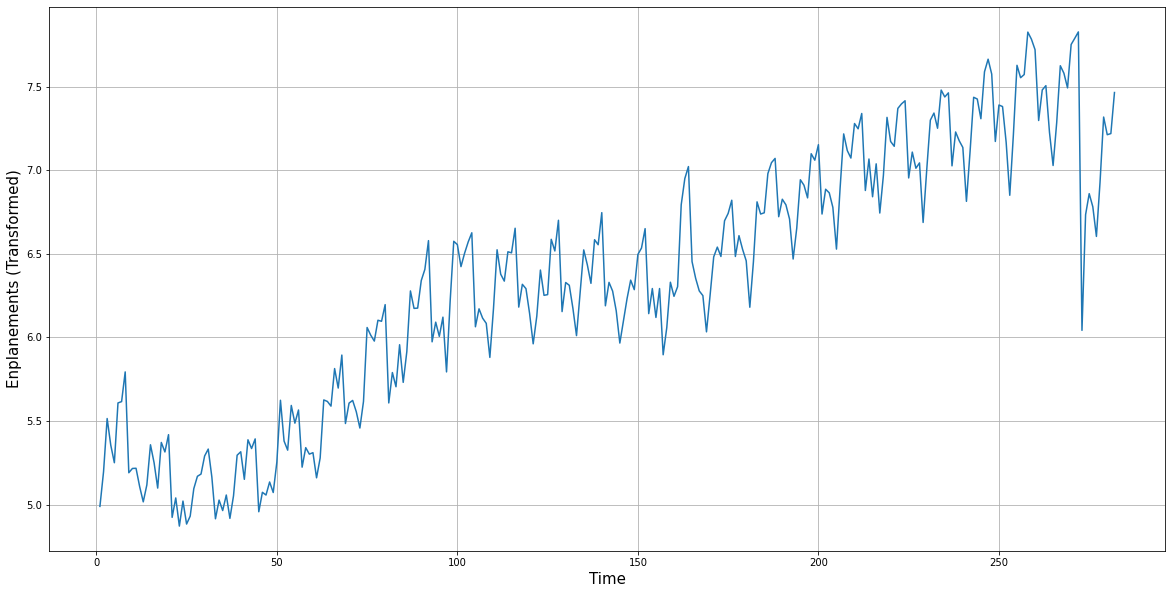

In [49]:
lambd = 0.3
ts_enplanements_tranformed = box_cox_transformation(ts_enplanements, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_enplanements_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Enplanements (Transformed)", fontsize = 15)
plt.grid()
plt.show()

# Question: 2

Why is a Box-Cox transformation unhelpful for the cangas data?

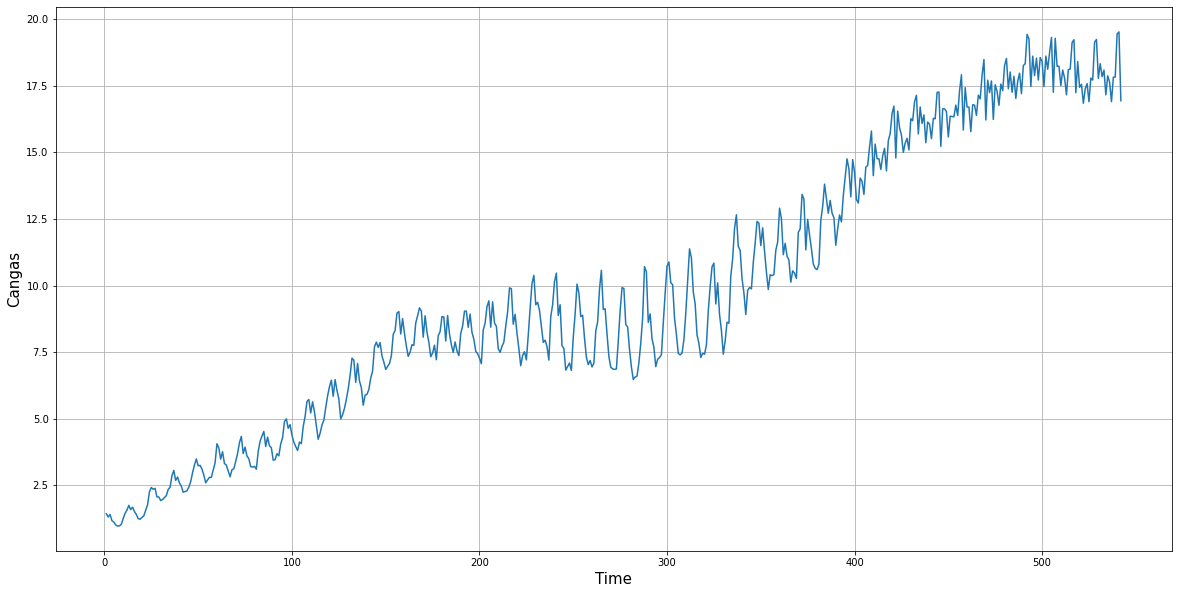

In [51]:
# importing the cangas data

ts_cangas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/cangas.csv", index_col="Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_cangas)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Cangas", fontsize = 15)
plt.grid()
plt.show()

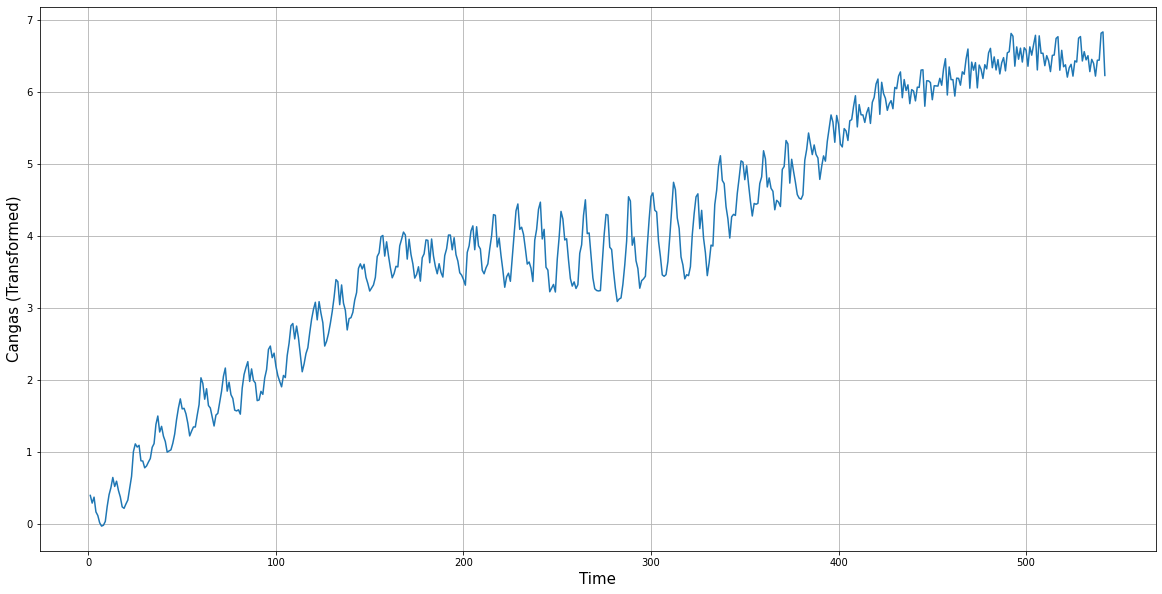

In [55]:
lambd = 0.5

ts_cangas_tranformed = box_cox_transformation(ts_cangas, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_cangas_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Cangas (Transformed)", fontsize = 15)
plt.grid()
plt.show()

**Answer**

After picking the best possible values for lambda, we are not able to stabilize the variance across the data. Using box cox tranformation is of no use in case of "cangas" data.

# Question: 3

What Box-Cox transformation would you select for your retail data (from Exercise 3 in Section 2.10)?

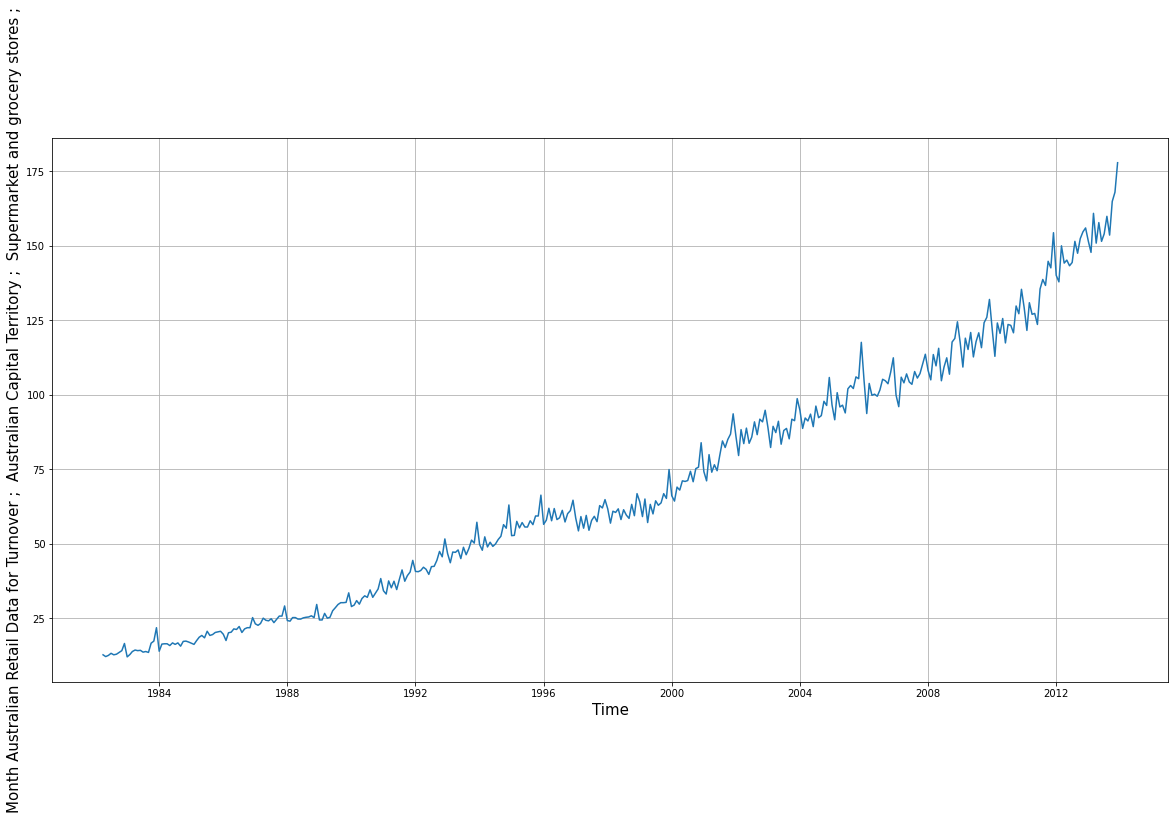

In [65]:
# importing the retail data

ts_retail = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/retail.xlsx", skiprows=[1], index_col="Unnamed: 0")

categories = ts_retail.columns  # list of all the columns
random_category = np.random.choice(categories)  # picking a random column

plt.figure(figsize = (20, 10))
plt.plot(ts_retail[random_category])
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Month Australian Retail Data for " + random_category, fontsize = 15)
plt.grid()
plt.show()

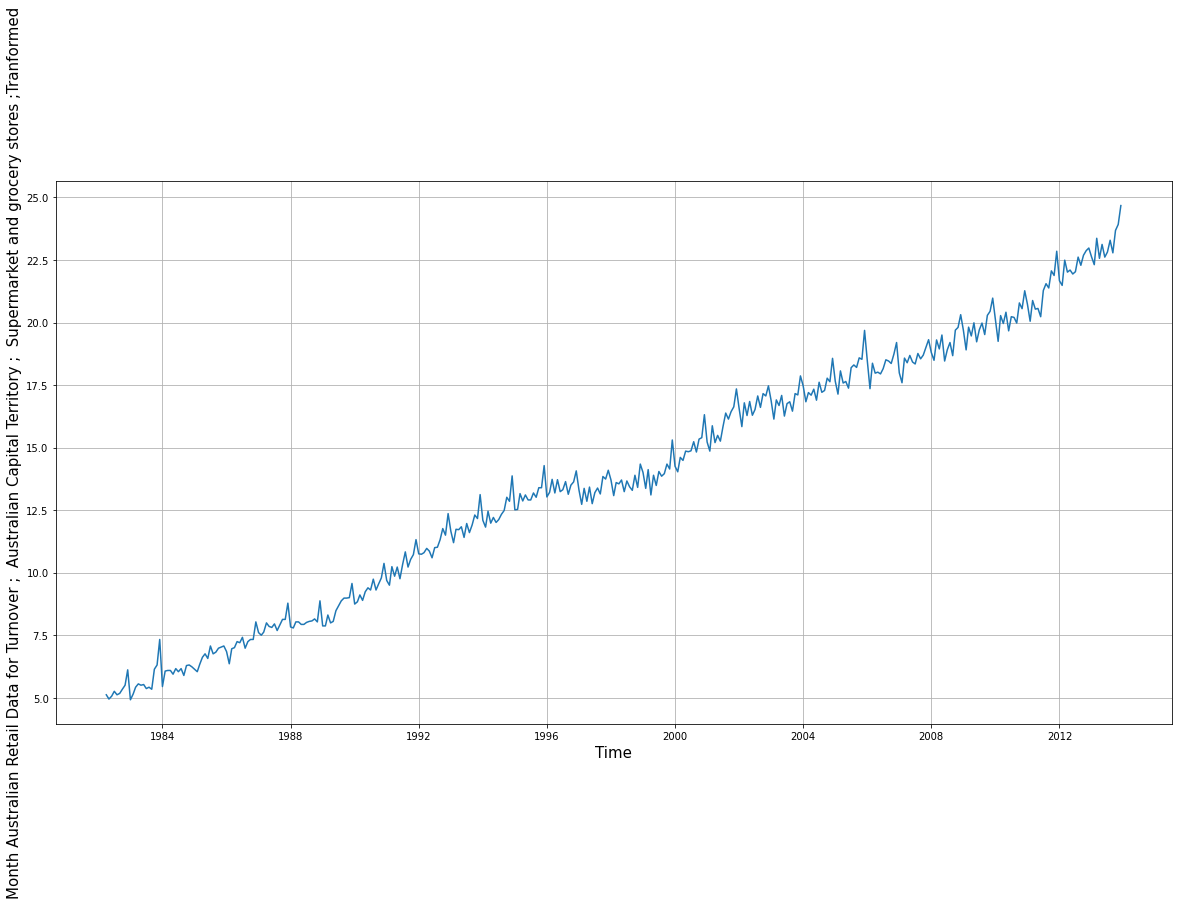

In [68]:
# applying tranformation on the data
lambd = 0.5

ts_retail_tranformed = box_cox_transformation(ts_retail[random_category], lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_retail_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Month Australian Retail Data for " + random_category + "Tranformed", fontsize = 15)
plt.grid()
plt.show()

# Question: 5

Calculate the residuals from a seasonal naïve forecast applied to the quarterly Australian beer production data from 1992

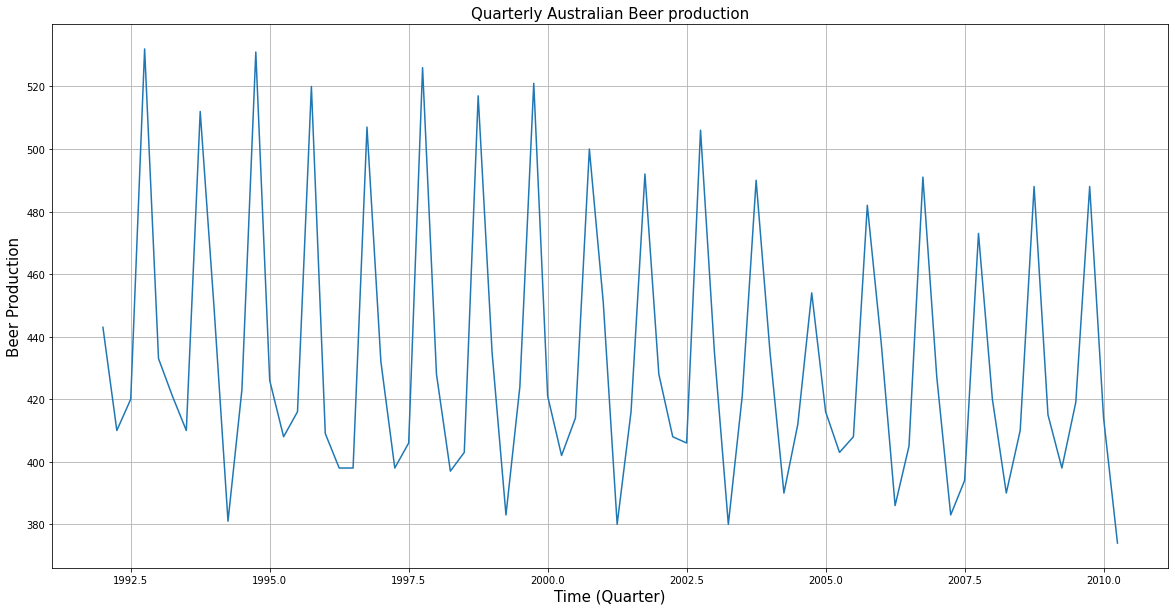

In [143]:
# importing the australian beer data
ts_ausbeer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/ausbeer.csv", index_col = "time")  # keeping time as index columns
ts_ausbeer.drop("Unnamed: 0", axis = 1, inplace = True)

ts_ausbeer = ts_ausbeer.loc[1992.0:, :]  # slicing data from 1992 onwards

# plotting the data
plt.figure(figsize = (20, 10))
plt.plot(ts_ausbeer)
plt.xlabel("Time (Quarter)", fontsize = 15)
plt.ylabel("Beer Production", fontsize = 15)
plt.title("Quarterly Australian Beer production", fontsize = 15)
plt.grid()
plt.show()

In [111]:
def seasonal_naive(ts, seasonal_period):
  """
  Function will return the seasonal naive predictions for a time series

  Arguments:
  ts -- a pandas time series, time series data

  Return:
  sn_predictions -- seasonal naive prediction of time series data
  """

  ts['snaive_prediction'] = 0

  for i in range(len(ts)):
    if i <= seasonal_period - 1:
      ts.iloc[i, 1] = ts.iloc[i, 0].value
    if:
      i == len(ts)
      break
    else:
      ts.iloc[i+seasonal_period, 1] = ts.iloc[i, 0].value


,value
time,
1956.00,284
1956.25,213
1956.50,227
1956.75,308
1957.00,262
1957.25,228
1957.50,236
1957.75,320
1958.00,272


In [144]:
ts_ausbeer_test = ts_ausbeer.head(10)

ts_ausbeer_test

,value
time,
1992.00,443
1992.25,410
1992.50,420
1992.75,532
1993.00,433
1993.25,421
1993.50,410
1993.75,512
1994.00,449
